### Goal

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os, sys
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt

sys.path.append("../../data_analysis/")
import helper as hp

In [3]:
savepath = "B01_explore_bump/"
os.makedirs(savepath, exist_ok=True)

In [4]:
path = "20240216_bleach_negc.xlsx"
df = pd.read_excel(f"{savepath}{path}", sheet_name="raw")
df.head(2)

,20240216_bleach_negc_1,20240216_bleach_negc_1.1,20240216_bleach_negc_1.2,20240216_bleach_negc_2,20240216_bleach_negc_2.1,20240216_bleach_negc_2.2,20240216_bleach_negc_4,20240216_bleach_negc_4.1,20240216_bleach_negc_4.2,20240216_bleach_negc_5,...,20240216_bleach_negc_91.2,20240216_bleach_negc_92,20240216_bleach_negc_92.1,20240216_bleach_negc_92.2,20240216_bleach_negc_93,20240216_bleach_negc_93.1,20240216_bleach_negc_93.2,20240216_bleach_negc_94,20240216_bleach_negc_94.1,20240216_bleach_negc_94.2
0,Force (g),Distance (mm),Time (sec),Force (g),Distance (mm),Time (sec),Force (g),Distance (mm),Time (sec),Force (g),...,Time (sec),Force (g),Distance (mm),Time (sec),Force (g),Distance (mm),Time (sec),Force (g),Distance (mm),Time (sec)
1,5.8,0,0,5.6,0,0,5.9,0,0,6,...,0,5.7,0,0,5.8,0,0,5.5,0,0


In [5]:
df.columns

Index(['20240216_bleach_negc_1', '20240216_bleach_negc_1.1',
       '20240216_bleach_negc_1.2', '20240216_bleach_negc_2',
       '20240216_bleach_negc_2.1', '20240216_bleach_negc_2.2',
       '20240216_bleach_negc_4', '20240216_bleach_negc_4.1',
       '20240216_bleach_negc_4.2', '20240216_bleach_negc_5',
       ...
       '20240216_bleach_negc_91.2', '20240216_bleach_negc_92',
       '20240216_bleach_negc_92.1', '20240216_bleach_negc_92.2',
       '20240216_bleach_negc_93', '20240216_bleach_negc_93.1',
       '20240216_bleach_negc_93.2', '20240216_bleach_negc_94',
       '20240216_bleach_negc_94.1', '20240216_bleach_negc_94.2'],
      dtype='object', length=420)

In [6]:
df = df[['20240216_bleach_negc_1', '20240216_bleach_negc_1.2', '20240216_bleach_negc_1.1']]
df.head(5)

,20240216_bleach_negc_1,20240216_bleach_negc_1.2,20240216_bleach_negc_1.1
0,Force (g),Time (sec),Distance (mm)
1,5.8,0,0
2,5.8,0.002,-0.003
3,5.6,0.004,-0.007
4,5.7,0.006,-0.011


In [7]:
df.columns = df.iloc[0]
df = df.iloc[1:]
df.head(5)


,Force (g),Time (sec),Distance (mm)
1,5.8,0,0
2,5.8,0.002,-0.003
3,5.6,0.004,-0.007
4,5.7,0.006,-0.011
5,6,0.008,-0.015


In [8]:
df['Distance (mm)'] = np.abs(df['Distance (mm)'])
df.head(3)

,Force (g),Time (sec),Distance (mm)
1,5.8,0,0
2,5.8,0.002,0.003
3,5.6,0.004,0.007


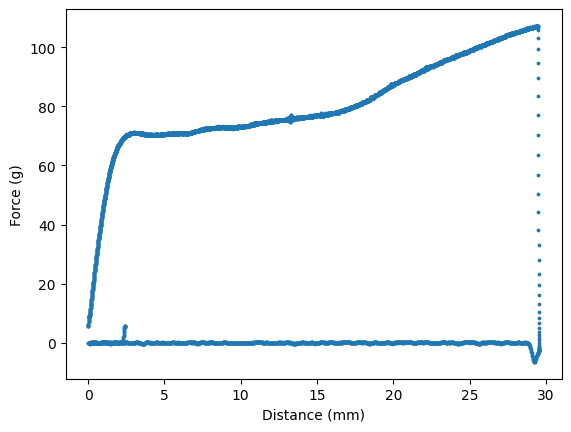

In [9]:
plt.scatter(df['Distance (mm)'], df['Force (g)'], s=3)
plt.xlabel('Distance (mm)')
plt.ylabel('Force (g)')
plt.show()

In [10]:
df = df[df['Force (g)'] >= 8]

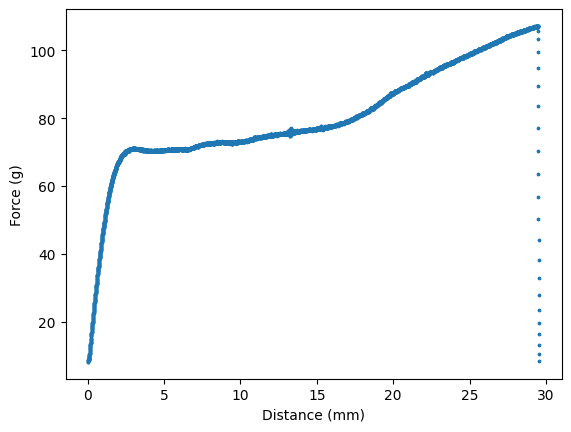

In [11]:
plt.scatter(df['Distance (mm)'], df['Force (g)'], s=3)
plt.xlabel('Distance (mm)')
plt.ylabel('Force (g)')
plt.show()

- stress = F/A
- strain = delta L / L

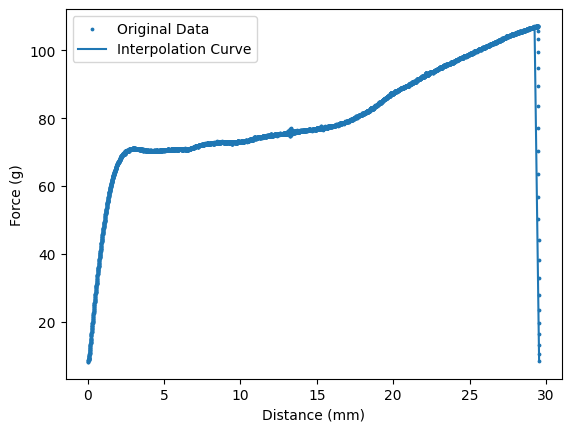

In [12]:
from scipy.interpolate import interp1d

# Extract the x and y values from the DataFrame
x = df['Distance (mm)'].astype(float)
y = df['Force (g)'].astype(float)

# Create the interpolation function
interp_func = interp1d(x, y, kind='cubic')

# Generate new x values for the interpolation curve
x_interp = np.linspace(x.min(), x.max(), 100)

# Compute the corresponding y values using the interpolation function
y_interp = interp_func(x_interp)

# Plot the original data and the interpolation curve
plt.scatter(x, y, s=3, label='Original Data')
plt.plot(x_interp, y_interp, label='Interpolation Curve')
plt.xlabel('Distance (mm)')
plt.ylabel('Force (g)')
plt.legend()
plt.show()

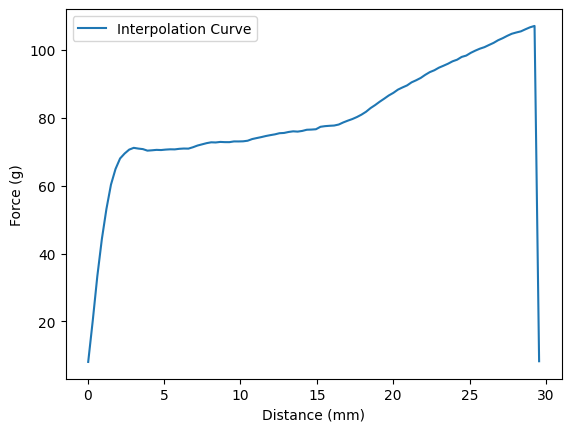

In [13]:
plt.plot(x_interp, y_interp, label='Interpolation Curve')
plt.xlabel('Distance (mm)')
plt.ylabel('Force (g)')
plt.legend()
plt.show()

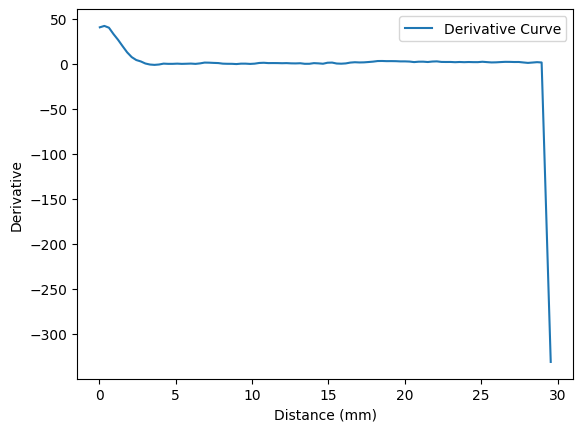

In [14]:
# Compute the derivative of the curve
dy_dx = np.gradient(y_interp, x_interp)

# Plot the derivative curve
plt.plot(x_interp, dy_dx, label='Derivative Curve')
plt.xlabel('Distance (mm)')
plt.ylabel('Derivative')
plt.legend()
plt.show()